In [2]:
import pandas as pd

arquivo = pd.read_csv("Dados.csv")

display(arquivo.head(2))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE


Verificando dados por fins lucrativos

In [5]:
df = pd.DataFrame(arquivo)

faculdades = df[df['MUNICIPIO'] == 'São Paulo']

faculdades_sp = faculdades[["MUNICIPIO", "CATEGORIA_ADMINISTRATIVA", "QT_VAGAS_AUTORIZADAS",]].groupby(["MUNICIPIO","CATEGORIA_ADMINISTRATIVA"]).sum()

fins_faculdades_sp = faculdades_sp.query('QT_VAGAS_AUTORIZADAS != 0')

display(fins_faculdades_sp)

QT_VAGAS_AUTORIZADAS
MUNICIPIO CATEGORIA_ADMINISTRATIVA                         
São Paulo Privada com fins lucrativos              10500013
          Privada sem fins lucrativos               2310697
          Pública Estadual                           105561
          Pública Federal                              5674
          Pública Municipal                           57545

In [17]:
dados = {
    'Categoria': ['Pr/com fins lucrativos','Pública Estadual','Pr/sem fins lucrativos','Pública Municipal'],
    'Qt_vagas':  [10500013,105561, 2310697, 57545  ]
}

vagas_categoria = pd.DataFrame(dados)

print(vagas_categoria)

                Categoria  Qt_vagas
0  Pr/com fins lucrativos  10500013
1        Pública Estadual    105561
2  Pr/sem fins lucrativos   2310697
3       Pública Municipal     57545


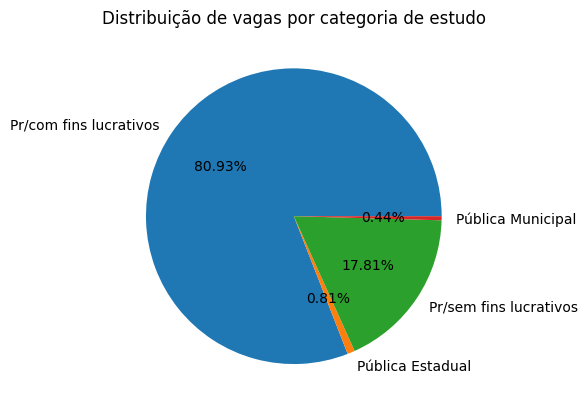

In [18]:
import matplotlib.pyplot as plt


categoria = vagas_categoria["Categoria"]   
qt = vagas_categoria["Qt_vagas"]

plt.title("Distribuição de vagas por categoria de estudo")
plt.pie(qt, labels=categoria, autopct="%1.2f%%")

plt.show()